# General Notebook

In [2]:
seed = 123
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import random
import torch
random.seed(seed)     # python random generator
np.random.seed(seed)  # numpy random generator

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

#-------------------------------
# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\data_mlsp_semi'
#-------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)

cpu


## Data

In [3]:
#--------------------------------------------
# 0: Vaquita girada
# 1: Cow     2: Human 
# 3: Horse   4: Camel
# 5: Dog1    6: Dog2
idx  = 4 # Id image
p = 40 # porcentage of missing labels  options: [40, 60, 80, 100]
names = ['bull', 'cow', 'human', 'horse', 'camel', 'dog1', 'dog2']
name_image = names[idx]+str(p)
print(name_image)

camel40


In [6]:
#!  Pay attention to idx when we read the data 
x1 = plt.imread(os.path.join(path, folder_data, 'x{}.png'.format(idx+1)))
m, n = x1.shape
y_true = plt.imread(os.path.join(path, folder_data, 'y{}.png'.format(idx+1))).reshape(m*n, 1)
y1 =  np.load(os.path.join(path, folder_data, 'y_miss_{}.npy'.format(p)))[idx].reshape(m*n, 1)
x = torch.tensor(x1.reshape(m*n, 1), dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32)
x = x.to(device)
y = y.to(device)

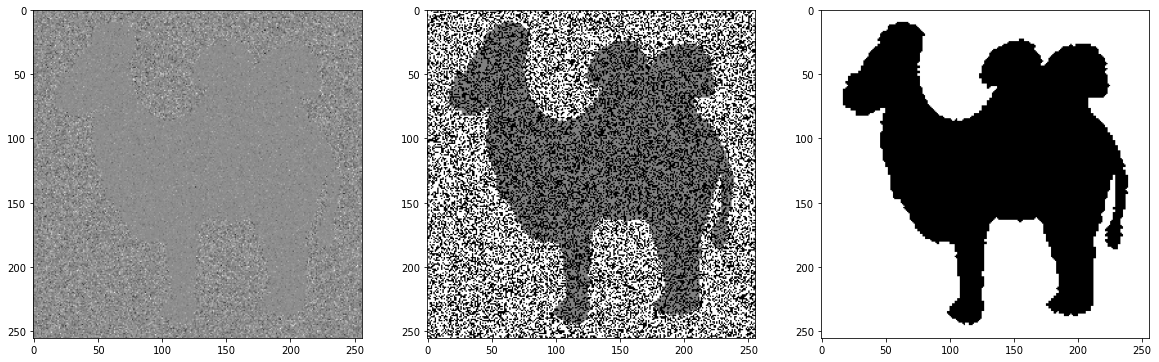

In [7]:
fig = plt.figure(figsize=(20, 30))  
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(y1.reshape(m,n), cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(y_true.reshape(m,n), cmap='gray')

## Functions and models

In [ ]:
from models.SVRNN import SVRNN
from models.SVRNN_2 import SVRNN_2
from models.VSL import VSL
from models.TMM import TMM
from utils.training import final_model, run_model_seq, num_param

# Models

In [ ]:
# General Parameters (we do not change the values of these parameters during the simulations)
x_dim = 1
y_dim = 1
# Parameters for the models
learning_rate = 0.005 # ! We can change this parameter but change the information in the sheet annotation
weight_decay_ = 1e-4
n_epochs = 100
clip = 10
print_every = 1
save_every = 2
#--------------------------------------------
# # Parameters for printing and saving the results
#! Change this path for your own path to save the results 
general_path  = os.path.join(os.getcwd(), 'Results_save_models')#! this option for save the results in the same folder of the code
# general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' 
#--------------------------------------------
print('Saving our model in',general_path)

## TMM

In [ ]:
# Dimension of latent variables
z_dim = 1
h_dim = None # This value is not necessary for the TMM model
num_neurons = 63 #? == h_dim?
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = ''# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = TMM(x_dim, z_dim, y_dim, num_neurons, device)

In [ ]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


In [ ]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

### Initialization from a specific epoch 

In [ ]:
# # #* Initialization of the model in an specific epoch
# model.to(device)
# epoch_init = 100
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
# #-----------------------------------------------------
# model = final_model(model, optimizer, epoch_init, path_save)
# #loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


### Reconstruction image

In [ ]:
# # #* Reconstruction
# y_ = model.sample(x,y)
# y_pred_m = y_[np.where(y1 == -1)].detach().numpy()
# y_true_m = y_true[np.where(y1 == -1)]
# error_rate = 1-accuracy_score(y_true_m, y_pred_m)
#print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

## SVRNN models
### svrnn_2

In [ ]:
# Dimension of latent variables
z_dim = 1
h_dim = 20 # This value is not necessary for the TMM model
num_neurons = h_dim #? == h_dim?
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = ''# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
#--------------------------------------------
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device)
#--------------------------------------------
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')
# #* Training
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)


### svrnn

In [ ]:
# # Dimension of latent variables
# z_dim = 1
# h_dim = 20 # This value is not necessary for the TMM model
# num_neurons = h_dim #? == h_dim?
# #--------------------------------------------
# #! Change here if the model is the same but with different parameters
# setting = ''# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
# #--------------------------------------------
# #--------------------------------------------
# model = SVRNN(x_dim, z_dim, h_dim, y_dim, num_neurons, device)
# #--------------------------------------------
# #--------------------------------------------
# # Save models
# #--------------------------------------------
# model.to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
# print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
# print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
# data = model.__class__.__name__.casefold()+'_'+name_image+setting
# path_save = os.path.join(general_path, data)
# if not os.path.exists(path_save):
#     os.makedirs(path_save)
# print(f'Actual path to save our models for {data} is \n {path_save} ')
# # #* Training
# loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)


In [ ]:
# # #* Initialization of the model in an specific epoch
# model = SVRNN(x_dim, z_dim, h_dim, y_dim, num_neurons, device)
# model.to(device)
# epoch_init = 100
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
# #-----------------------------------------------------
# model = final_model(model, optimizer, epoch_init, path_save)
# # # loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [ ]:
# # #* Reconstruction
# y_ = model.sample(x,y)
# y_pred_m = y_[np.where(y1 == -1)].detach().numpy()
# y_true_m = y_true[np.where(y1 == -1)]
# error_rate = 1-accuracy_score(y_true_m, y_pred_m)
# print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )